In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from helpers import *
import hvplot.pandas

In [2]:
#merging all the datasets into one
mergestorm_df = pd.concat( 
    map(pd.read_csv, ["resources/stormevents_2022.csv", 
                      "resources/stormevents_2021.csv",
                      "resources/stormevents_2020.csv",
                      "resources/stormevents_2019.csv",
                      "resources/stormevents_2018.csv", 
                      "resources/stormevents_2017.csv", 
                      "resources/stormevents_2016.csv", 
                      "resources/stormevents_2015.csv", 
                      "resources/stormevents_2014.csv", 
                      "resources/stormevents_2013.csv", 
                      "resources/stormevents_2012.csv", 
                      "resources/stormevents_2011.csv", 
                      "resources/stormevents_2010.csv", 
                      "resources/stormevents_2009.csv", 
                      "resources/stormevents_2008.csv"]), ignore_index=True) 
mergestorm_df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,202202,20,2118,202202,20,2218,165464,999902,NEVADA,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strong winds increased ahead of an approaching...,"Station (UP994) 3.1 SE West Wendover, Elevatio...",CSV
1,202202,21,800,202202,22,1000,165465,999903,NEVADA,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low centered over northern and central Nevad...,Thirteen inches fell at station (BCSN2) Big Cr...,CSV
2,202202,22,200,202202,22,900,165465,999904,NEVADA,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low centered over northern and central Nevad...,Fifteen inches fell at station (TJMN2) Toe Jam...,CSV
3,202202,18,1609,202202,18,1609,165611,1001181,ATLANTIC SOUTH,87,...,7.0,SE,PONTE VEDRA,30.050,-81.1700,30.0500,-81.1700,Pre-frontal showers and thunderstorms moved so...,A brief waterspout was observed offshore of So...,CSV
4,202202,2,0,202202,3,0,165668,1001527,AMERICAN SAMOA,97,...,5.0,NNW,VAITOGI,-14.333,-170.7157,-14.3393,-170.7268,A surface trough over the Islands held the po...,"Over a 24-hour period, WSO Pago Pago recorded ...",CSV


In [3]:
mergestorm_df.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS',
       'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
       'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE',
       'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE',
       'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype='object')

In [4]:
# Create a DataFrame with selected columns 
clean_mergestorm_df = mergestorm_df[["YEAR","EPISODE_ID", "EVENT_ID", "STATE", "EVENT_TYPE",  
                                "INJURIES_DIRECT", "INJURIES_INDIRECT","DEATHS_DIRECT", "DEATHS_INDIRECT",
                                "DAMAGE_PROPERTY","DAMAGE_CROPS", "SOURCE", "MAGNITUDE", "MAGNITUDE_TYPE", 
                                "TOR_F_SCALE", "TOR_LENGTH", "TOR_WIDTH", "TOR_OTHER_CZ_STATE", "BEGIN_LOCATION", 
                                "BEGIN_LAT", "BEGIN_LON", "END_LAT", "END_LON"]]
clean_mergestorm_df.head()

,YEAR,EPISODE_ID,EVENT_ID,STATE,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,...,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
0,2022,165464,999902,NEVADA,High Wind,0,0,0,0,0.00K,...,MS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,165465,999903,NEVADA,Heavy Snow,0,0,0,0,0.00K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,165465,999904,NEVADA,Heavy Snow,0,0,0,0,0.00K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,165611,1001181,ATLANTIC SOUTH,Waterspout,0,0,0,0,0.00K,...,NaN,NaN,NaN,NaN,NaN,PONTE VEDRA,30.050,-81.1700,30.0500,-81.1700
4,2022,165668,1001527,AMERICAN SAMOA,Heavy Rain,0,0,0,0,50.00K,...,NaN,NaN,NaN,NaN,NaN,VAITOGI,-14.333,-170.7157,-14.3393,-170.7268


In [5]:
#convert property damages from object to string 
retype_damage_col(clean_mergestorm_df)
clean_mergestorm_df.info()

C:\Users\Enrique\desktop\kevin\team1\helpers.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DAMAGE_CROPS'] = data['DAMAGE_CROPS'].apply(retype_damage_value)
C:\Users\Enrique\desktop\kevin\team1\helpers.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DAMAGE_PROPERTY'] = data['DAMAGE_PROPERTY'].apply(retype_damage_value)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948286 entries, 0 to 948285
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   YEAR                948286 non-null  int64  
 1   EPISODE_ID          948286 non-null  int64  
 2   EVENT_ID            948286 non-null  int64  
 3   STATE               948286 non-null  object 
 4   EVENT_TYPE          948286 non-null  object 
 5   INJURIES_DIRECT     948286 non-null  int64  
 6   INJURIES_INDIRECT   948286 non-null  int64  
 7   DEATHS_DIRECT       948286 non-null  int64  
 8   DEATHS_INDIRECT     948286 non-null  int64  
 9   DAMAGE_PROPERTY     948286 non-null  float64
 10  DAMAGE_CROPS        948286 non-null  float64
 11  SOURCE              948286 non-null  object 
 12  MAGNITUDE           500839 non-null  float64
 13  MAGNITUDE_TYPE      340870 non-null  object 
 14  TOR_F_SCALE         21140 non-null   object 
 15  TOR_LENGTH          21140 non-null

In [6]:
# Add new columns that combine direct and indirect deaths; direct and indirect injuries; and property damage and crop damage
clean_mergestorm_df.loc[:,"TOTAL DEATHS"] = clean_mergestorm_df["DEATHS_DIRECT"] + clean_mergestorm_df["DEATHS_INDIRECT"]
clean_mergestorm_df.loc[:,"TOTAL INJURIES"] = clean_mergestorm_df["INJURIES_DIRECT"] + clean_mergestorm_df["INJURIES_INDIRECT"]
clean_mergestorm_df["TOTAL DAMAGES"] = clean_mergestorm_df["DAMAGE_PROPERTY"] + clean_mergestorm_df["DAMAGE_CROPS"]

clean_mergestorm_df.tail()

C:\Users\Enrique\AppData\Local\Temp\ipykernel_208288\1318311347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_mergestorm_df.loc[:,"TOTAL DEATHS"] = clean_mergestorm_df["DEATHS_DIRECT"] + clean_mergestorm_df["DEATHS_INDIRECT"]
C:\Users\Enrique\AppData\Local\Temp\ipykernel_208288\1318311347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_mergestorm_df.loc[:,"TOTAL INJURIES"] = clean_mergestorm_df["INJURIES_DIRECT"] + clean_mergestorm_df["INJURIES_INDIRECT"]
C:\Users\Enrique\AppData\Local

,YEAR,EPISODE_ID,EVENT_ID,STATE,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,...,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES
948281,2008,18919,111312,FLORIDA,Hail,0,0,0,0,0.0,...,NaN,NaN,RITAL,28.5233,-82.2320,28.5233,-82.2320,0,0,0.0
948282,2008,18495,108243,FLORIDA,Thunderstorm Wind,0,0,0,0,500.0,...,NaN,NaN,HULL,27.1323,-81.9050,27.1323,-81.9050,0,0,500.0
948283,2008,18708,109851,GULF OF MEXICO,Marine Thunderstorm Wind,0,0,0,0,0.0,...,NaN,NaN,MIDDLE TAMPA BAY,27.7651,-82.6270,27.7651,-82.6270,0,0,0.0
948284,2008,16372,94501,FLORIDA,Hail,0,0,0,0,0.0,...,NaN,NaN,THONOTOSASSA,28.0762,-82.2492,28.0762,-82.2492,0,0,0.0
948285,2008,18495,108160,FLORIDA,Lightning,0,0,0,0,500.0,...,NaN,NaN,SAFETY HARBOR,27.9824,-82.7087,27.9824,-82.7087,0,0,500.0


In [7]:
drop_merged_df = clean_mergestorm_df.drop(columns=["INJURIES_DIRECT", "INJURIES_INDIRECT",
                                                   "DEATHS_DIRECT", "DEATHS_INDIRECT"])
drop_merged_df.head()

,YEAR,EPISODE_ID,EVENT_ID,STATE,EVENT_TYPE,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,...,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES
0,2022,165464,999902,NEVADA,High Wind,0.0,0.0,Mesonet,36.0,MS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0
1,2022,165465,999903,NEVADA,Heavy Snow,0.0,0.0,SNOTEL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0
2,2022,165465,999904,NEVADA,Heavy Snow,0.0,0.0,SNOTEL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0
3,2022,165611,1001181,ATLANTIC SOUTH,Waterspout,0.0,0.0,Trained Spotter,NaN,NaN,...,NaN,NaN,PONTE VEDRA,30.050,-81.1700,30.0500,-81.1700,0,0,0.0
4,2022,165668,1001527,AMERICAN SAMOA,Heavy Rain,50000.0,0.0,Official NWS Observations,NaN,NaN,...,NaN,NaN,VAITOGI,-14.333,-170.7157,-14.3393,-170.7268,0,0,50000.0


In [8]:
# Checking that new fields did not lose any information by comparing dataframes
print(clean_mergestorm_df["DEATHS_DIRECT"].sum()+clean_mergestorm_df["DEATHS_INDIRECT"].sum()  )
print(clean_mergestorm_df["INJURIES_DIRECT"].sum()+clean_mergestorm_df["INJURIES_INDIRECT"].sum()  )
print(drop_merged_df[["TOTAL DEATHS", "TOTAL INJURIES"]].sum())

12198
48392
TOTAL DEATHS      12198
TOTAL INJURIES    48392
dtype: int64


In [9]:
# Narrow down events that have had at least one death and/or at least one injury 
narrow_df = drop_merged_df.loc[(drop_merged_df["TOTAL DEATHS"] > 0) | 
                               (drop_merged_df["TOTAL INJURIES"] > 0),]

# reset the index 
narrow_df.reset_index(drop=True, inplace=True)

# Display sample data
narrow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13924 entries, 0 to 13923
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                13924 non-null  int64  
 1   EPISODE_ID          13924 non-null  int64  
 2   EVENT_ID            13924 non-null  int64  
 3   STATE               13924 non-null  object 
 4   EVENT_TYPE          13924 non-null  object 
 5   DAMAGE_PROPERTY     13924 non-null  float64
 6   DAMAGE_CROPS        13924 non-null  float64
 7   SOURCE              13924 non-null  object 
 8   MAGNITUDE           2811 non-null   float64
 9   MAGNITUDE_TYPE      2703 non-null   object 
 10  TOR_F_SCALE         1462 non-null   object 
 11  TOR_LENGTH          1462 non-null   float64
 12  TOR_WIDTH           1462 non-null   float64
 13  TOR_OTHER_CZ_STATE  461 non-null    object 
 14  BEGIN_LOCATION      6307 non-null   object 
 15  BEGIN_LAT           6307 non-null   float64
 16  BEGI

In [10]:
# Export the narrowed data into a csv
narrow_df.to_csv("narrow_df.csv")

In [11]:
# Read saved data
narrow_df = pd.read_csv("narrow_df.csv")

# Display sample data
narrow_df.head()

,Unnamed: 0,YEAR,EPISODE_ID,EVENT_ID,STATE,EVENT_TYPE,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,...,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES
0,0,2022,165593,1001094,FLORIDA,Dense Fog,0.0,0.0,Emergency Manager,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,30,0.0
1,1,2022,175269,1078711,MISSOURI,Winter Storm,0.0,0.0,Public,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,0.0
2,2,2022,168741,1021872,FLORIDA,Rip Current,0.0,0.0,County Official,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0.0
3,3,2022,169739,1027877,FLORIDA,Rip Current,0.0,0.0,Lifeguard,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0.0
4,4,2022,167427,1013708,TEXAS,Tornado,0.0,0.0,NWS Storm Survey,NaN,...,440.0,NaN,FRUITLAND,33.5182,-97.8369,33.5815,-97.7953,0,3,0.0


In [12]:
#reordering dataframe in order to have most relevant files first
reordernarrow_df = narrow_df[["YEAR","EPISODE_ID", "EVENT_ID", "STATE", "EVENT_TYPE",  
                              "TOTAL DEATHS", "TOTAL INJURIES", "TOTAL DAMAGES",
                              "DAMAGE_PROPERTY","DAMAGE_CROPS", "SOURCE", "MAGNITUDE", 
                              "MAGNITUDE_TYPE", "TOR_F_SCALE", "TOR_LENGTH", "TOR_WIDTH", 
                              "TOR_OTHER_CZ_STATE", "BEGIN_LOCATION", "BEGIN_LAT", 
                              "BEGIN_LON", "END_LAT", "END_LON"]]
reordernarrow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13924 entries, 0 to 13923
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                13924 non-null  int64  
 1   EPISODE_ID          13924 non-null  int64  
 2   EVENT_ID            13924 non-null  int64  
 3   STATE               13924 non-null  object 
 4   EVENT_TYPE          13924 non-null  object 
 5   TOTAL DEATHS        13924 non-null  int64  
 6   TOTAL INJURIES      13924 non-null  int64  
 7   TOTAL DAMAGES       13924 non-null  float64
 8   DAMAGE_PROPERTY     13924 non-null  float64
 9   DAMAGE_CROPS        13924 non-null  float64
 10  SOURCE              13924 non-null  object 
 11  MAGNITUDE           2811 non-null   float64
 12  MAGNITUDE_TYPE      2703 non-null   object 
 13  TOR_F_SCALE         1462 non-null   object 
 14  TOR_LENGTH          1462 non-null   float64
 15  TOR_WIDTH           1462 non-null   float64
 16  TOR_

In [13]:
# Exploratry sorting by total damages column. Noted that duplicate Event_IDs are tied to single Episode_ID
# and grouping would be needed to calculate true totals per event 
reordernarrow_df.sort_values(["TOTAL DAMAGES"], ascending=False)

,YEAR,EPISODE_ID,EVENT_ID,STATE,EVENT_TYPE,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES,DAMAGE_PROPERTY,DAMAGE_CROPS,...,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
3640,2018,131864,788675,CALIFORNIA,Wildfire,86,12,1.700000e+10,1.700000e+10,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4890,2017,119753,720861,TEXAS,Flash Flood,38,0,1.000010e+10,1.000000e+10,100000.0,...,NaN,NaN,NaN,NaN,NaN,JOYCE,29.5688,-95.0139,29.6026,-95.3778
4880,2017,119753,720871,TEXAS,Flash Flood,6,0,1.000001e+10,1.000000e+10,10000.0,...,NaN,NaN,NaN,NaN,NaN,SAN LEON,29.4972,-94.9164,29.3800,-94.8669
4871,2017,119753,720852,TEXAS,Flash Flood,3,0,8.000050e+09,8.000000e+09,50000.0,...,NaN,NaN,NaN,NaN,NaN,KENDLETON,29.4493,-96.0027,29.8075,-95.8090
4879,2017,119753,728349,TEXAS,Flash Flood,4,0,7.000010e+09,7.000000e+09,10000.0,...,NaN,NaN,NaN,NaN,NaN,BOY,30.0408,-95.2487,30.1168,-95.8557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5433,2016,105514,632940,IOWA,High Wind,0,2,0.000000e+00,0.000000e+00,0.0,...,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5434,2016,107571,644682,COLORADO,Lightning,1,0,0.000000e+00,0.000000e+00,0.0,...,NaN,NaN,NaN,NaN,NaN,RED FEATHER LAKES,40.8000,-105.5800,40.8000,-105.5800
5435,2016,109073,653270,OKLAHOMA,Heat,1,11,0.000000e+00,0.000000e+00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5439,2016,106436,638954,WEST VIRGINIA,Thunderstorm Wind,1,0,0.000000e+00,0.000000e+00,0.0,...,EG,NaN,NaN,NaN,NaN,FAIRVIEW,38.9559,-81.9823,38.9559,-81.9823


In [14]:
# Exploratry sorting by total deaths and injuries 
sorted_df =reordernarrow_df.sort_values(["TOTAL DEATHS","TOTAL INJURIES"], ascending=False)
sorted_df.head()

,YEAR,EPISODE_ID,EVENT_ID,STATE,EVENT_TYPE,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES,DAMAGE_PROPERTY,DAMAGE_CROPS,...,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
9652,2011,49972,296617,MISSOURI,Tornado,161,1150,2.800000e+09,2.800000e+09,0.0,...,NaN,EF5,8.8,1600.0,MO,CENTRAL CITY,37.056,-94.5701,37.0544,-94.4105
1098,2021,158241,961302,OREGON,Excessive Heat,93,0,1.000000e+05,5.000000e+04,50000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3640,2018,131864,788675,CALIFORNIA,Wildfire,86,12,1.700000e+10,1.700000e+10,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454,2022,174632,1058654,FLORIDA,Hurricane,60,0,7.000000e+09,7.000000e+09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,2022,171258,1039790,TEXAS,Heat,53,0,0.000000e+00,0.000000e+00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Use a groupby to identify deadliest storms when collapsing event_ids and 
#grouping by episode_id. Noted 2011 has 3 of top 5 deadliest storms
byid_event_state = reordernarrow_df[["YEAR","EPISODE_ID","EVENT_TYPE","STATE","TOTAL DEATHS", 
                          "TOTAL INJURIES", "TOTAL DAMAGES"]].groupby(["EPISODE_ID","YEAR",
                                                                        "EVENT_TYPE","STATE"]).sum()
byid_event_state.sort_values(["TOTAL DEATHS","TOTAL INJURIES"], ascending=False).head(10)

,,,,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES
EPISODE_ID,YEAR,EVENT_TYPE,STATE,,,
49972,2011,Tornado,MISSOURI,161,1152,2.801000e+09
50455,2011,Tornado,ALABAMA,147,1998,3.121367e+09
158241,2021,Excessive Heat,OREGON,118,0,1.000000e+05
50516,2011,Tornado,ALABAMA,100,124,1.090000e+09
131864,2018,Wildfire,CALIFORNIA,86,12,1.700000e+10
174632,2022,Hurricane,FLORIDA,85,0,1.300200e+10
175040,2021,Excessive Heat,ARIZONA,60,0,0.000000e+00
164438,2021,Tornado,KENTUCKY,58,519,0.000000e+00
119753,2017,Flash Flood,TEXAS,55,0,3.595019e+10


In [16]:
#Create a dataframe that counts the unique episode IDs by event type 
# is sorted in descending order. Nunique returns unique values in each column(in this case, episode_ID)
event_counts = reordernarrow_df[["EPISODE_ID",
                                 "EVENT_TYPE"]].groupby(["EVENT_TYPE"]).nunique().sort_values("EPISODE_ID", 
                                                                                              ascending = False)
# Copy the 7 highest frequency events int a new dataframe
pie_chart = event_counts.head(7).reset_index(drop = False)
pie_chart

,EVENT_TYPE,EPISODE_ID
0,Thunderstorm Wind,1593
1,Lightning,1327
2,Tornado,976
3,Winter Weather,926
4,Rip Current,784
5,Heat,635
6,Flash Flood,622


In [17]:
# Calculate total events and create varaible for all storms excluding top 7 (everything else)
total= event_counts["EPISODE_ID"].sum()
ev_else = total-pie_chart["EPISODE_ID"].sum()
ev_else

4091

In [18]:
# Add everything else row to pie chart dataframe
pie_chart.loc[len(pie_chart.index)] = ["Everything Else", ev_else]
pie_chart

,EVENT_TYPE,EPISODE_ID
0,Thunderstorm Wind,1593
1,Lightning,1327
2,Tornado,976
3,Winter Weather,926
4,Rip Current,784
5,Heat,635
6,Flash Flood,622
7,Everything Else,4091


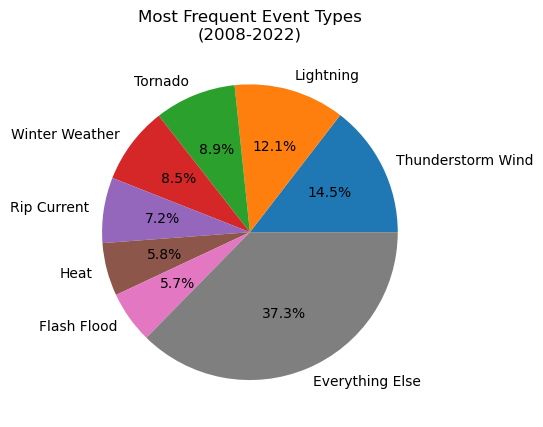

In [19]:
# Plot pie chart of episode frequency and save as png
pie_chart.plot.pie(y = "EPISODE_ID", labels = pie_chart["EVENT_TYPE"] , autopct="%1.1f%%", legend = False, 
                  title = "Most Frequent Event Types\n(2008-2022)", ylabel = "", startangle = 0)
plt.savefig("visualizations/event_types_freq_pie.png")
plt.show()

In [41]:
# Create summary (sum) tables for deaths by event type, injuries by event type 
# and damange by event type using groupby.sum() and sorting by total deaths
deathsbytype = reordernarrow_df[["EVENT_TYPE", "TOTAL DEATHS"]].groupby("EVENT_TYPE").sum().sort_values("TOTAL DEATHS",ascending = False)
injuriesbytype = reordernarrow_df[["EVENT_TYPE", "TOTAL INJURIES"]].groupby("EVENT_TYPE").sum().sort_values("TOTAL INJURIES",ascending = False)
damagebytype = reordernarrow_df[["EVENT_TYPE", "TOTAL DAMAGES"]].groupby("EVENT_TYPE").sum().sort_values("TOTAL DAMAGES",ascending = False)
print(deathsbytype.head())
print(injuriesbytype.head())
print(damagebytype.head())

                TOTAL DEATHS
EVENT_TYPE                  
Excessive Heat          1540
Heat                    1405
Tornado                 1301
Flash Flood             1090
Winter Weather           839
                   TOTAL INJURIES
EVENT_TYPE                       
Tornado                     15205
Winter Weather               5121
Excessive Heat               4875
Heat                         3821
Thunderstorm Wind            3367
               TOTAL DAMAGES
EVENT_TYPE                  
Flash Flood     5.160175e+10
Hurricane       3.673777e+10
Wildfire        2.204071e+10
Tornado         2.173204e+10
Coastal Flood   7.653735e+09


In [22]:
# Copy the 7 highest frequency events int a new dataframe
pie_chart2 = deathsbytype.head(7).reset_index(drop = False)
pie_chart2

,EVENT_TYPE,TOTAL DEATHS
0,Excessive Heat,1540
1,Heat,1405
2,Tornado,1301
3,Flash Flood,1090
4,Winter Weather,839
5,Rip Current,830
6,Thunderstorm Wind,545


In [23]:
# Calculate total events and create varaible for all storms excluding top 7 (everything else)
total2= deathsbytype["TOTAL DEATHS"].sum()
ev_else2 = total2-pie_chart2["TOTAL DEATHS"].sum()
ev_else2

4648

In [24]:
# Add everything else row to pie chart dataframe
pie_chart2.loc[len(pie_chart2.index)] = ["Everything Else", ev_else2]
pie_chart2

,EVENT_TYPE,TOTAL DEATHS
0,Excessive Heat,1540
1,Heat,1405
2,Tornado,1301
3,Flash Flood,1090
4,Winter Weather,839
5,Rip Current,830
6,Thunderstorm Wind,545
7,Everything Else,4648


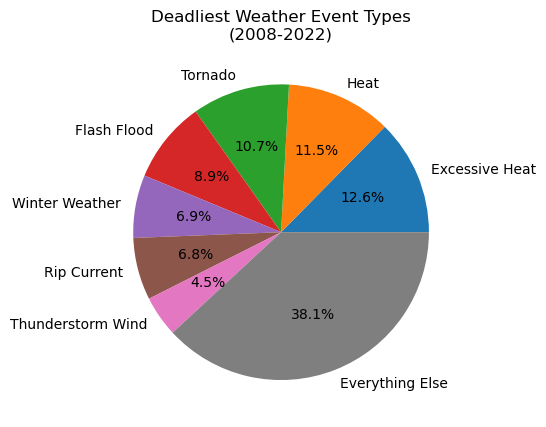

In [25]:
# Plot fianl pie chart of deadliest weather event types, and save as png
pie_chart2.plot.pie(y = "TOTAL DEATHS", labels = pie_chart2["EVENT_TYPE"] , autopct="%1.1f%%", legend = False, 
                  title = "Deadliest Weather Event Types\n(2008-2022)", ylabel = "", startangle = 0)
plt.savefig("visualizations/eventtype_deaths_pie.png")
plt.show()

In [26]:
# Create summary (sum) tables for deaths by year, injuries by year 
# and damange by year using groupby.sum() and sorting by total deaths
deathsbyyear = reordernarrow_df[["YEAR", "TOTAL DEATHS"]].groupby("YEAR").sum()
injuriesbyyear =  reordernarrow_df[["YEAR", "TOTAL INJURIES"]].groupby("YEAR").sum()
damagebyyear = reordernarrow_df[["YEAR", "TOTAL DAMAGES"]].groupby("YEAR").sum()
print(deathsbyyear)

      TOTAL DEATHS
YEAR              
2008           826
2009           559
2010           677
2011          1336
2012           707
2013           592
2014           558
2015           701
2016           667
2017           721
2018          1047
2019           731
2020           897
2021          1260
2022           919


In [27]:
# Get aggregate summary statistics for deaths by year
deathsbyyear.agg(['mean', 'median','var','std','sem'])

,TOTAL DEATHS
mean,813.200000
median,721.000000
var,57408.314286
std,239.600322
sem,61.864537


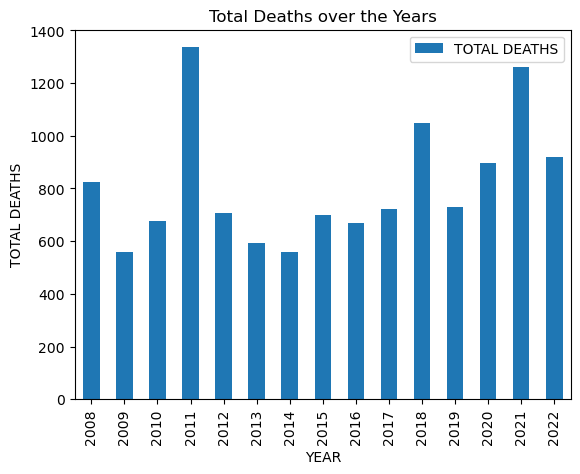

In [28]:
# Create a bar chart for total deaths over the years 
deathsbyyear.plot(kind = "bar")
plt.title('Total Deaths over the Years')
plt.xlabel('YEAR')
plt.ylabel('TOTAL DEATHS')
plt.show()


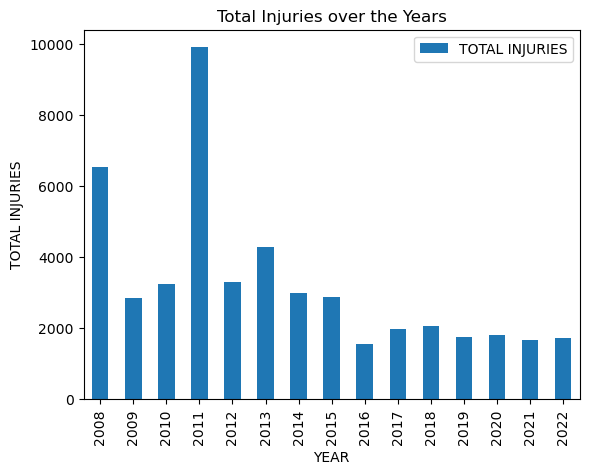

In [29]:
# Create a bar chart for total injuries over the years 
injuriesbyyear.plot(kind = "bar")
plt.title('Total Injuries over the Years')
plt.xlabel('YEAR')
plt.ylabel('TOTAL INJURIES')
plt.show()

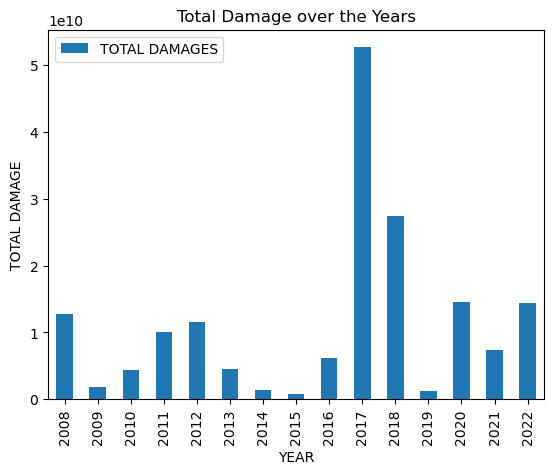

In [30]:
# Create a bar chart for total damage over the years 
damagebyyear.plot(kind = "bar")
plt.title('Total Damage over the Years')
plt.xlabel('YEAR')
plt.ylabel('TOTAL DAMAGE')
plt.show()

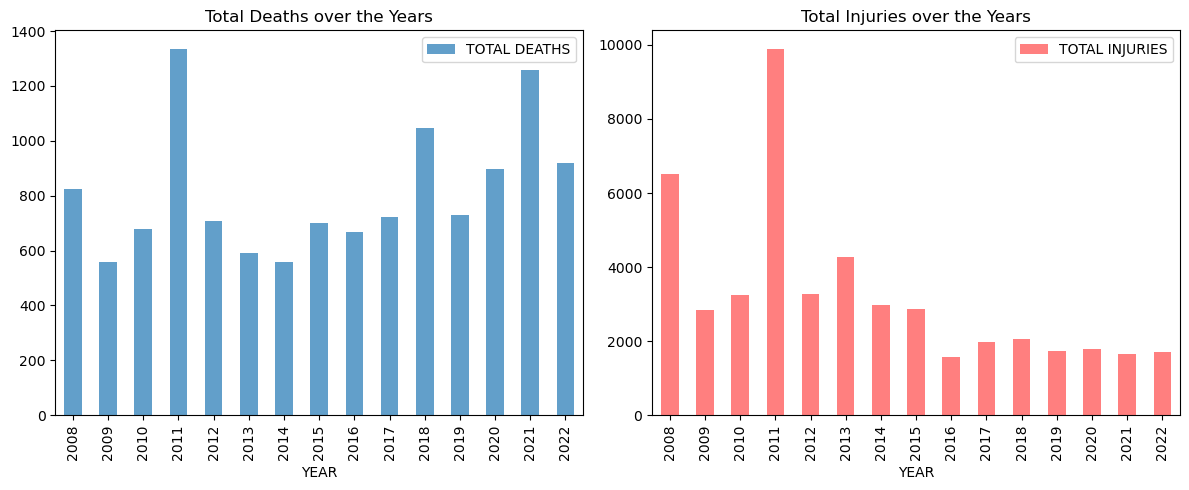

In [31]:
# Create final visualization for project plotting deaths and injuries by year
# side by side for slidedeck
figure, axis = plt.subplots(1,2,figsize=(12, 5))
deathsbyyear.plot(kind = "bar", ax = axis[0], title = 'Total Deaths over the Years',alpha = .7)

injuriesbyyear.plot(kind = "bar",ax=axis[1], title = 'Total Injuries over the Years', 
                    color = 'r', alpha = .5)
figure.tight_layout()
plt.savefig("visualizations/deaths&injuriesbyyear.png")
plt.show()

In [32]:
# List of top 5 sources from dataset. Not used in final analysis 
mergestorm_df["SOURCE"].value_counts().head()

SOURCE
Trained Spotter      156028
Public               108894
Emergency Manager     84840
Law Enforcement       77900
Mesonet               65552
Name: count, dtype: int64